In [2]:
%pip install plotly
%pip install nltk
%pip install tensorflow
%pip install seaborn
%pip install sklearn
%pip install pandas
%pip install cufflinks
%pip install jupyterlab 
%pip install ipywidgets
%pip install pydot
%pip install pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-2.8.0-cp38-cp38-manylinux2010_x86_64.whl (497.6 MB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import time
from datetime import date
# Not supported in python 3.7 or above
# from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
import re
# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
import cufflinks as cf
import pandas as pd
cf.go_offline()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
data_df = pd.read_csv("data.csv")
print(f"Data shape {data_df.shape}")
data = data_df.iloc[:700000,:]
print(f"Data shape {data.shape}")

Data shape (1371202, 4)
Data shape (700000, 4)


In [36]:
data.isna().sum()

id               0
location    212473
text             0
target           0
dtype: int64

In [37]:
# data = data.dropna()
data.groupby('target').describe()

id                                                          \
           count           mean            std  min        25%       50%   
target                                                                     
0       289826.0  339472.879510  204157.121112  1.0  148268.25  325934.5   
1       410174.0  357439.240964  200253.701834  2.0  194151.25  366021.5   

                             
              75%       max  
target                       
0       532997.50  699989.0  
1       520494.75  700000.0

In [38]:
df_spam = data[data['target']==0]
df_spam.shape

(289826, 4)

In [39]:
df_ham = data[data['target']==1]
df_ham.shape

(410174, 4)

In [40]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(289826, 4)

In [41]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(579652, 4)

In [42]:
df_balanced['target'].value_counts()
df_balanced

,id,location,text,target
555331,555332,United States of America,RT @outerspacemanII: Coronavirus in the U.S.: ...,1
72097,72098,"Lynnwood, WA","RT @gruber: Geez, I wonder whose tinpot-dictat...",1
684454,684455,"Quarantine zone, PNW",RT @GlennF: No correlation! No correlation! ht...,1
75005,75006,America,US stocks close mixed as virus drug report off...,1
473425,473426,"Some Oversized Cafe, Somewhere",RT @vexwerewolf: Capitalists need to pay for t...,1
...,...,...,...,...
699972,699973,Sussex,RT @angelaeagle: Truly shocking that Govt woul...,0
699977,699978,NaN,RT @angelaeagle: Truly shocking that Govt woul...,0
699985,699986,"Avon, Oxon, London, UK, Earth",When you think you can't get even a tiny bit m...,0
699986,699987,NaN,"RT @guardiannews: Over 1,000 deaths a day: UK ...",0


In [43]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def remove_url(text):
    no_html= pattern.sub('',text)
    return no_html

# Remove all text that start with http
df_balanced.text = df_balanced.text.apply(lambda x: remove_url(x))
df_balanced.head()

,id,location,text,target
555331,555332,United States of America,RT @outerspacemanII: Coronavirus in the U.S.: ...,1
72097,72098,"Lynnwood, WA","RT @gruber: Geez, I wonder whose tinpot-dictat...",1
684454,684455,"Quarantine zone, PNW",RT @GlennF: No correlation! No correlation!,1
75005,75006,America,US stocks close mixed as virus drug report off...,1
473425,473426,"Some Oversized Cafe, Somewhere",RT @vexwerewolf: Capitalists need to pay for t...,1


In [44]:
# now remove stopwords, change to lowercase

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    # split to array (default delimiter is " ")
    text = text.split()
    text = [w for w in text if not w in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

print("Cleaning text...")
df_balanced.text = df_balanced.text.apply(lambda x : clean_text(x))


Cleaning text...


In [45]:
# How many unique words int this dataset

def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

text_values = df_balanced.text
counter = counter_word(text_values)
print(f"The len of words is: {len(counter)}")
list(counter.items())[:10]

The len of words is: 170084


[('rt', 276599),
 ('outerspacemanii', 3),
 ('coronavirus', 198479),
 ('u', 23266),
 ('latest', 6208),
 ('map', 3700),
 ('case', 6735),
 ('count', 1172),
 ('new', 38000),
 ('york', 3426)]

In [46]:
train, test, train_category, test_category = train_test_split(df_balanced.text, df_balanced.target, test_size=0.30, random_state=42)
train_category.value_counts()
train.head(4)

540859    rt guardian get trump normalised mayhem us pay...
590389                           rt belle gyanna say louder
322030    rt new world dogs trained alert covid wonderfu...
484262    rt johniadarola new zealand beat covid trustin...
Name: text, dtype: object

In [47]:
test_category.value_counts()

0    87122
1    86774
Name: target, dtype: int64

In [48]:

vocab_size = len(counter)
embedding_dim = 32

# Max number of words in each complaint
max_length = 20
trunc_type = 'post'
padding_type = 'pre'

# oov_took its set for words out our word index
oov_tok = "<XXX>"
training_size = int(len(train) * 0.8)
seq_len = 12

# based on 80% of the data
training_sentences = train[0:training_size]
training_labels = train_category[0:training_size]

valid_sentences = train[training_size:]
valid_labels = train_category[training_size:]

print('The Shape of training ',training_sentences.shape)
print('The Shape of testing',valid_sentences.shape)

The Shape of training  (324604,)
The Shape of testing (81152,)


In [49]:
training_labels.value_counts()

1    162314
0    162290
Name: target, dtype: int64

In [50]:
valid_labels.value_counts()

1    40738
0    40414
Name: target, dtype: int64

In [51]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [52]:
# Lets see the first 10 elements
print("THe first word Index are: ")
for x in list(word_index)[0:15]:
    print (" {},  {} ".format(x,  word_index[x]))

THe first word Index are: 
 <XXX>,  1 
 rt,  2 
 coronavirus,  3 
 covid,  4 
 guardian,  5 
 trump,  6 
 us,  7 
 new,  8 
 cases,  9 
 pandemic,  10 
 china,  11 
 uk,  12 
 news,  13 
 people,  14 
 says,  15 


In [53]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
T = training_padded.shape[0]
print("The shape of training data is: ",training_padded.shape, T)

The shape of training data is:  (324604, 20) 324604


In [54]:
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print("The shape of validation data is: ",valid_padded.shape)

The shape of validation data is:  (81152, 20)


In [24]:
import tensorflow_hub as hub
import tensorflow_text as text
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [71]:
#Model Definition with LSTM

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
#     tf.keras.layers.LSTM(64, return_sequences=True),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid') # binary classification
# ])


# #using BERT
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# # Neural network layers
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# # Use inputs and outputs to construct a final model
# model = tf.keras.Model(inputs=[text_input], outputs = [l])



# ##working model
# i = tf.keras.layers.Input(shape=(max_length,))
# x= tf.keras.layers.Embedding(vocab_size+1, embedding_dim)(i)
# x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
# x = tf.keras.layers.Dropout(0.05)(x)    #optional might be better to use dropout
# x = tf.keras.layers.GlobalMaxPooling1D()(x)
# x = tf.keras.layers.Dense(1, activation='sigmoid')(x)


#Ensemble CNN-GRU
def ensemble_CNN_BiGRU(filters = 100, kernel_size = 3, activation='relu', max_length = max_length):
  
    # Channel 1D CNN
    input1 = tf.keras.layers.Input(shape=(max_length,))
    embeddding1 = tf.keras.layers.Embedding(vocab_size+1, embedding_dim)(input1)
    conv1 = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
                   kernel_constraint= tf.keras.constraints.MaxNorm( max_value=3, axis=[0,1]))(embeddding1)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(conv1)
    flat1 = tf.keras.layers.Flatten()(pool1)
    drop1 = tf.keras.layers.Dropout(0.25)(flat1)
    dense1 = tf.keras.layers.Dense(40, activation='relu')(drop1)
    dense1 = tf.keras.layers.Dense(10, activation='relu')(dense1)
    drop1 = tf.keras.layers.Dropout(0.25)(dense1)
    out1 = tf.keras.layers.Dense(1, activation='sigmoid')(drop1)
    
    # Channel BiGRU
    input2 = tf.keras.layers.Input(shape=(max_length,))
    embeddding2 = tf.keras.layers.Embedding(vocab_size+1, embedding_dim, mask_zero=True)(input2)
    gru2 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64))(embeddding2)
    drop2 = tf.keras.layers.Dropout(0.25)(gru2)
    out2 = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)
    
    merged = tf.keras.layers.concatenate([out1, out2])
    
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(merged)
    model = tf.keras.models.Model(inputs=[input1, input2], outputs=outputs)
    
    model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


model = ensemble_CNN_BiGRU()

#CNN with better config
# i = tf.keras.layers.Input(shape=(max_length,))
# x = tf.keras.layers.Embedding(vocab_size+1, embedding_dim)(i)
# x = tf.keras.layers.Conv1D(32, 3, activation='relu')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.20)(x)
# x = tf.keras.layers.MaxPooling1D(3)(x)
# x = tf.keras.layers.Conv1D(64, 3, activation='relu')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.20)(x)
# x = tf.keras.layers.Conv1D(128, 3, activation='relu')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.20)(x)
# x = tf.keras.layers.GlobalMaxPooling1D()(x)
# x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.models.Model(inputs=i, outputs=x)

# model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'binary_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 20, 32)       5442720     ['input_9[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 18, 100)      9700        ['embedding_8[0][0]']            
                                                                                                  
 max_pooling1d_4 (MaxPooling1D)  (None, 9, 100)      0           ['conv1d_4[0][0]']               
                                                                                            

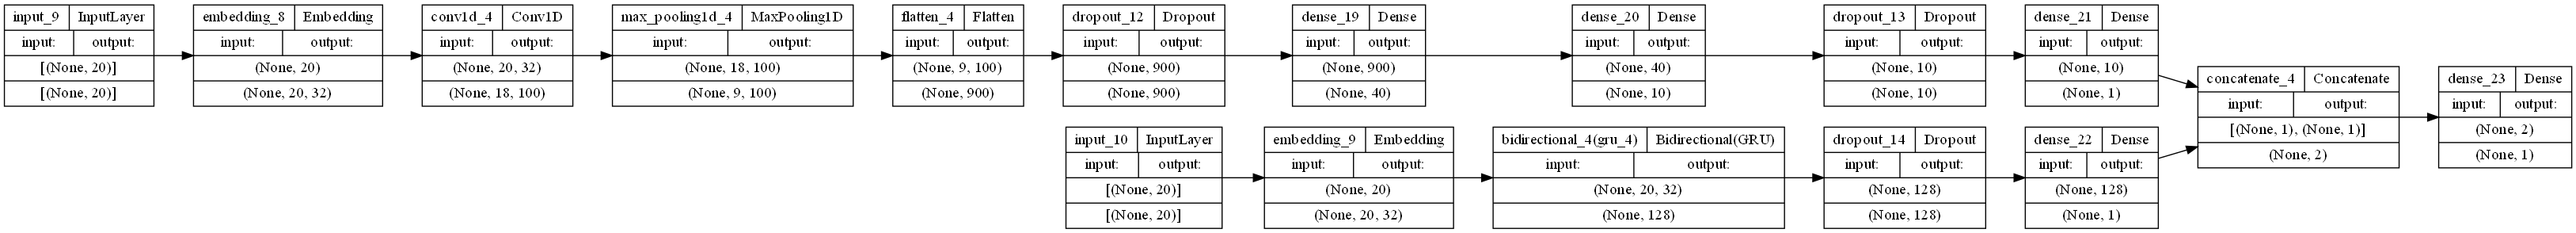

In [72]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True, rankdir='LR', dpi=100)

In [73]:
num_epochs = 2
history = model.fit([training_padded, training_padded], training_labels,batch_size =10,  epochs=num_epochs, validation_data=([valid_padded, valid_padded], valid_labels))


Epoch 1/2
32461/32461 [==============================] - 2369s 73ms/step - loss: 0.2520 - accuracy: 0.8983 - val_loss: 0.1868 - val_accuracy: 0.9186
Epoch 2/2
32461/32461 [==============================] - 2469s 76ms/step - loss: 0.1319 - accuracy: 0.9472 - val_loss: 0.1800 - val_accuracy: 0.9223


<AxesSubplot:>

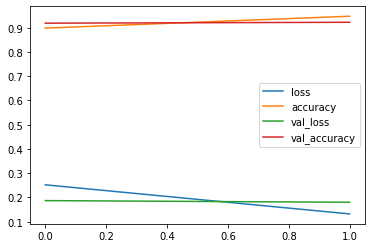

In [74]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

<AxesSubplot:>

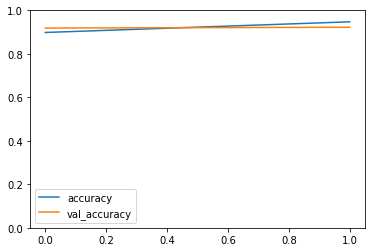

In [75]:
model_loss[['accuracy','val_accuracy']].plot(ylim=[0,1])

In [76]:
predictions = (model.predict([valid_padded,valid_padded]) > 0.5).astype("int32")
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

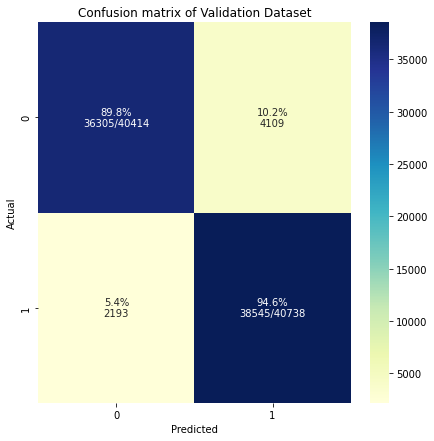

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
# Showing Confusion Matrix
plot_cm(valid_labels,predictions, 'Confusion matrix of Validation Dataset', figsize=(7,7))

In [79]:
testing_sequences = tokenizer.texts_to_sequences(test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = (model.predict([testing_padded,testing_padded]) > 0.5).astype("int32")

predictions


array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [81]:
testing_padded.shape

(173896, 20)

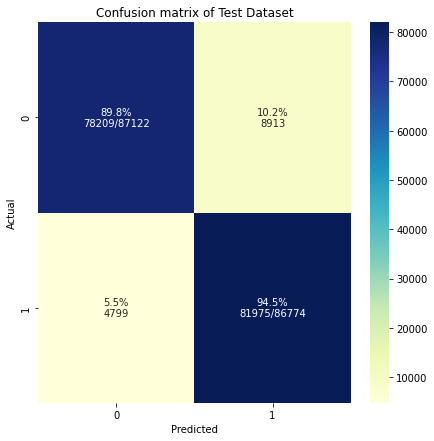

In [80]:
# Showing Confusion Matrix
plot_cm(test_category,predictions, 'Confusion matrix of Test Dataset', figsize=(7,7))

In [71]:
model.save(f"models/Bi-LSTM ({date.today().strftime('%m-%d-%y')})")

2022-04-12 17:04:50.781586: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/Bi-LSTM (04-12-22)/assets


INFO:tensorflow:Assets written to: models/Bi-LSTM (04-12-22)/assets
